In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
train_dir = 'NEU Metal Surface Defects Data/train'
val_dir = 'NEU Metal Surface Defects Data/valid'
test_dir='NEU Metal Surface Defects Data/test'
print("Path Direcorty: ",os.listdir("NEU Metal Surface Defects Data"))
print("Train Direcorty: ",os.listdir("NEU Metal Surface Defects Data/train"))
print("Test Direcorty: ",os.listdir("NEU Metal Surface Defects Data/test"))
print("Validation Direcorty: ",os.listdir("NEU Metal Surface Defects Data/valid"))

Path Direcorty:  ['test', 'Thumbs.db', 'train', 'valid']
Train Direcorty:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
Test Direcorty:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
Validation Direcorty:  ['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']


In [3]:
print("Training Inclusion data:",len(os.listdir(train_dir+'/'+'Inclusion')))
print("Testing Inclusion data:",len(os.listdir(test_dir+'/'+'Inclusion')))
print("Validation Inclusion data:",len(os.listdir(val_dir+'/'+'Inclusion')))

Training Inclusion data: 276
Testing Inclusion data: 12
Validation Inclusion data: 12


## Understanding of each category

---

### 1. **Inclusion**
- **Description**: Non-metallic materials (like oxides or sulfides) embedded within the steel surface during the manufacturing process. These inclusions create imperfections that reduce the metal’s strength and impact resistance.

---

### 2. **Rolled-in Scale**
- **Description**: Occurs when the oxide layer (scale) formed on the metal surface during heating is not removed before rolling. As a result, this scale gets pressed into the surface, creating streaks or spots that affect the metal’s finish.

---

### 3. **Pitted Surface**
- **Description**: Small depressions or cavities formed on the metal surface due to trapped gas or foreign particles during the casting process. These pits reduce the smoothness of the surface and can weaken the metal.

---

### 4. **Scratches**
- **Description**: Linear marks or streaks caused by mechanical friction, handling, or surface contact during the manufacturing process. These scratches affect the appearance and can compromise the integrity of the steel surface.

---

### 5. **Patches**
- **Description**: Uneven areas on the steel surface, often caused by inconsistent heating, cooling, or pressure during production. Patches are typically visible as blotches or discolored regions.

---

### 6. **Crazing**
- **Description**: A network of fine cracks that appear on the steel surface due to high tensile stresses during cooling or rolling. These cracks weaken the material’s overall structure and can lead to further damage.

---

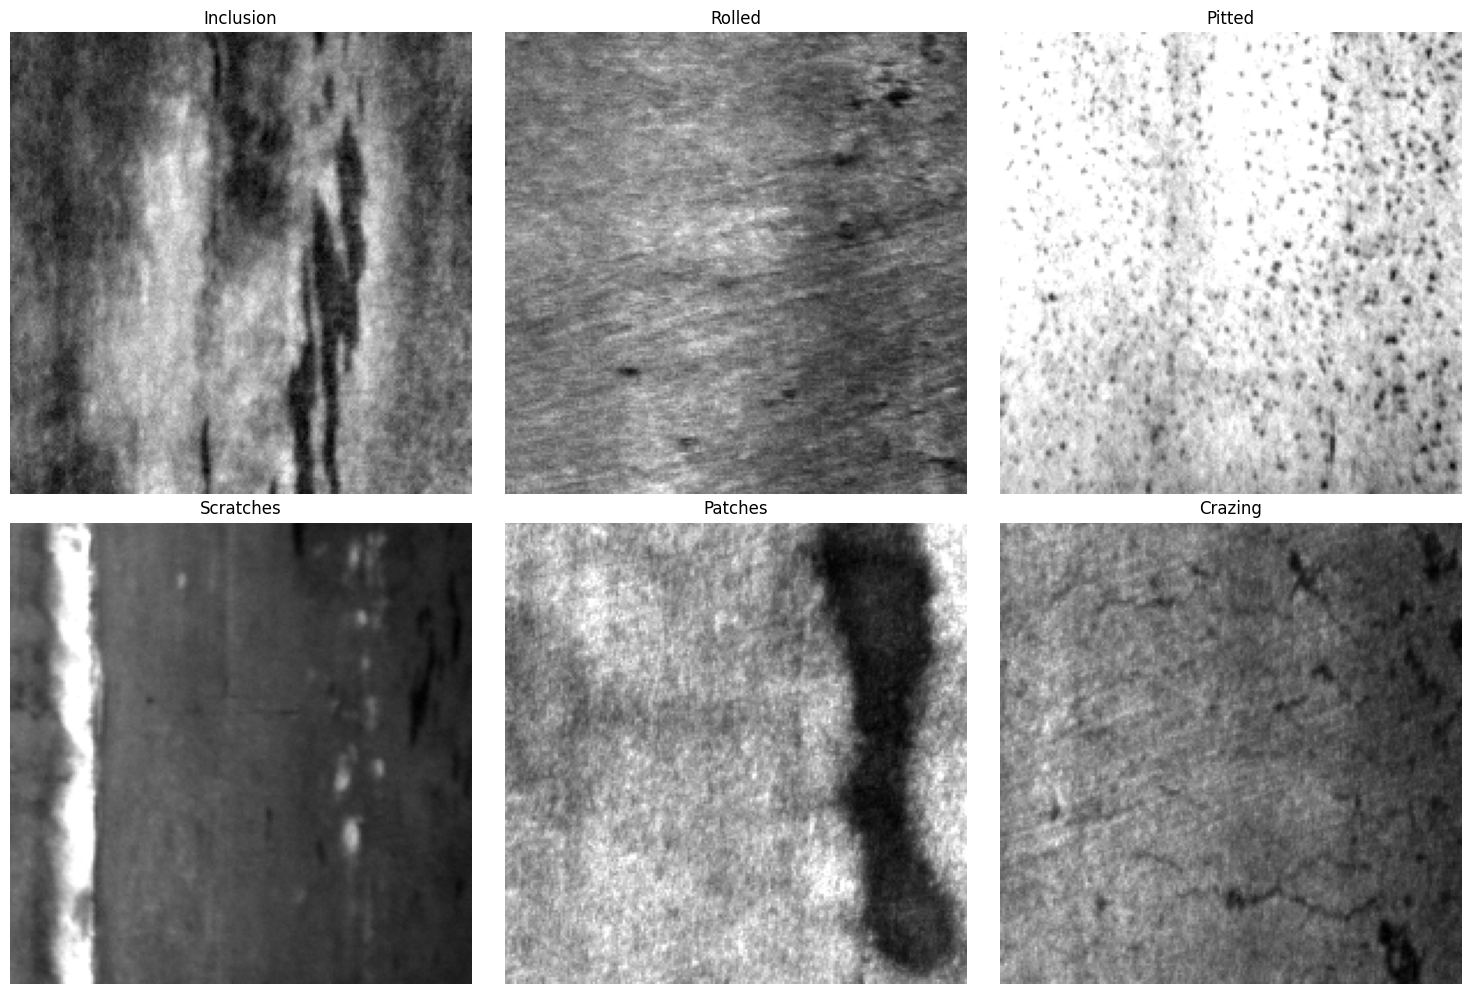

In [4]:
import os
import matplotlib.pyplot as plt
import cv2


categories = ['Inclusion', 'Rolled', 'Pitted', 'Scratches', 'Patches', 'Crazing']
train_dir = 'NEU Metal Surface Defects Data/train'

plt.figure(figsize=(15, 10))

for i, category in enumerate(categories):

    category_path = os.path.join(train_dir, category)
    image_file = os.listdir(category_path)[1]  
    image_path = os.path.join(category_path, image_file)
    
    
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    plt.subplot(2, 3, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(category)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [5]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\rajra\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\rajra\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\rajra\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

In [8]:

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20.0,
    horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')


validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(200, 200),
        batch_size=10,
        class_mode='categorical')

Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [9]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.98 ):
            print("\nReached 98% accuracy so cancelling training!")
            self.model.stop_training = True 

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (2,2), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

C:\Users\rajra\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 199, 199, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 98, 98, 64)          │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 48, 48, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 73728)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      18,874,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,917,734 (72.17 MB)

 Trainable params: 18,917,734 (72.17 MB)

 Non-trainable params: 0 (0.00 B)

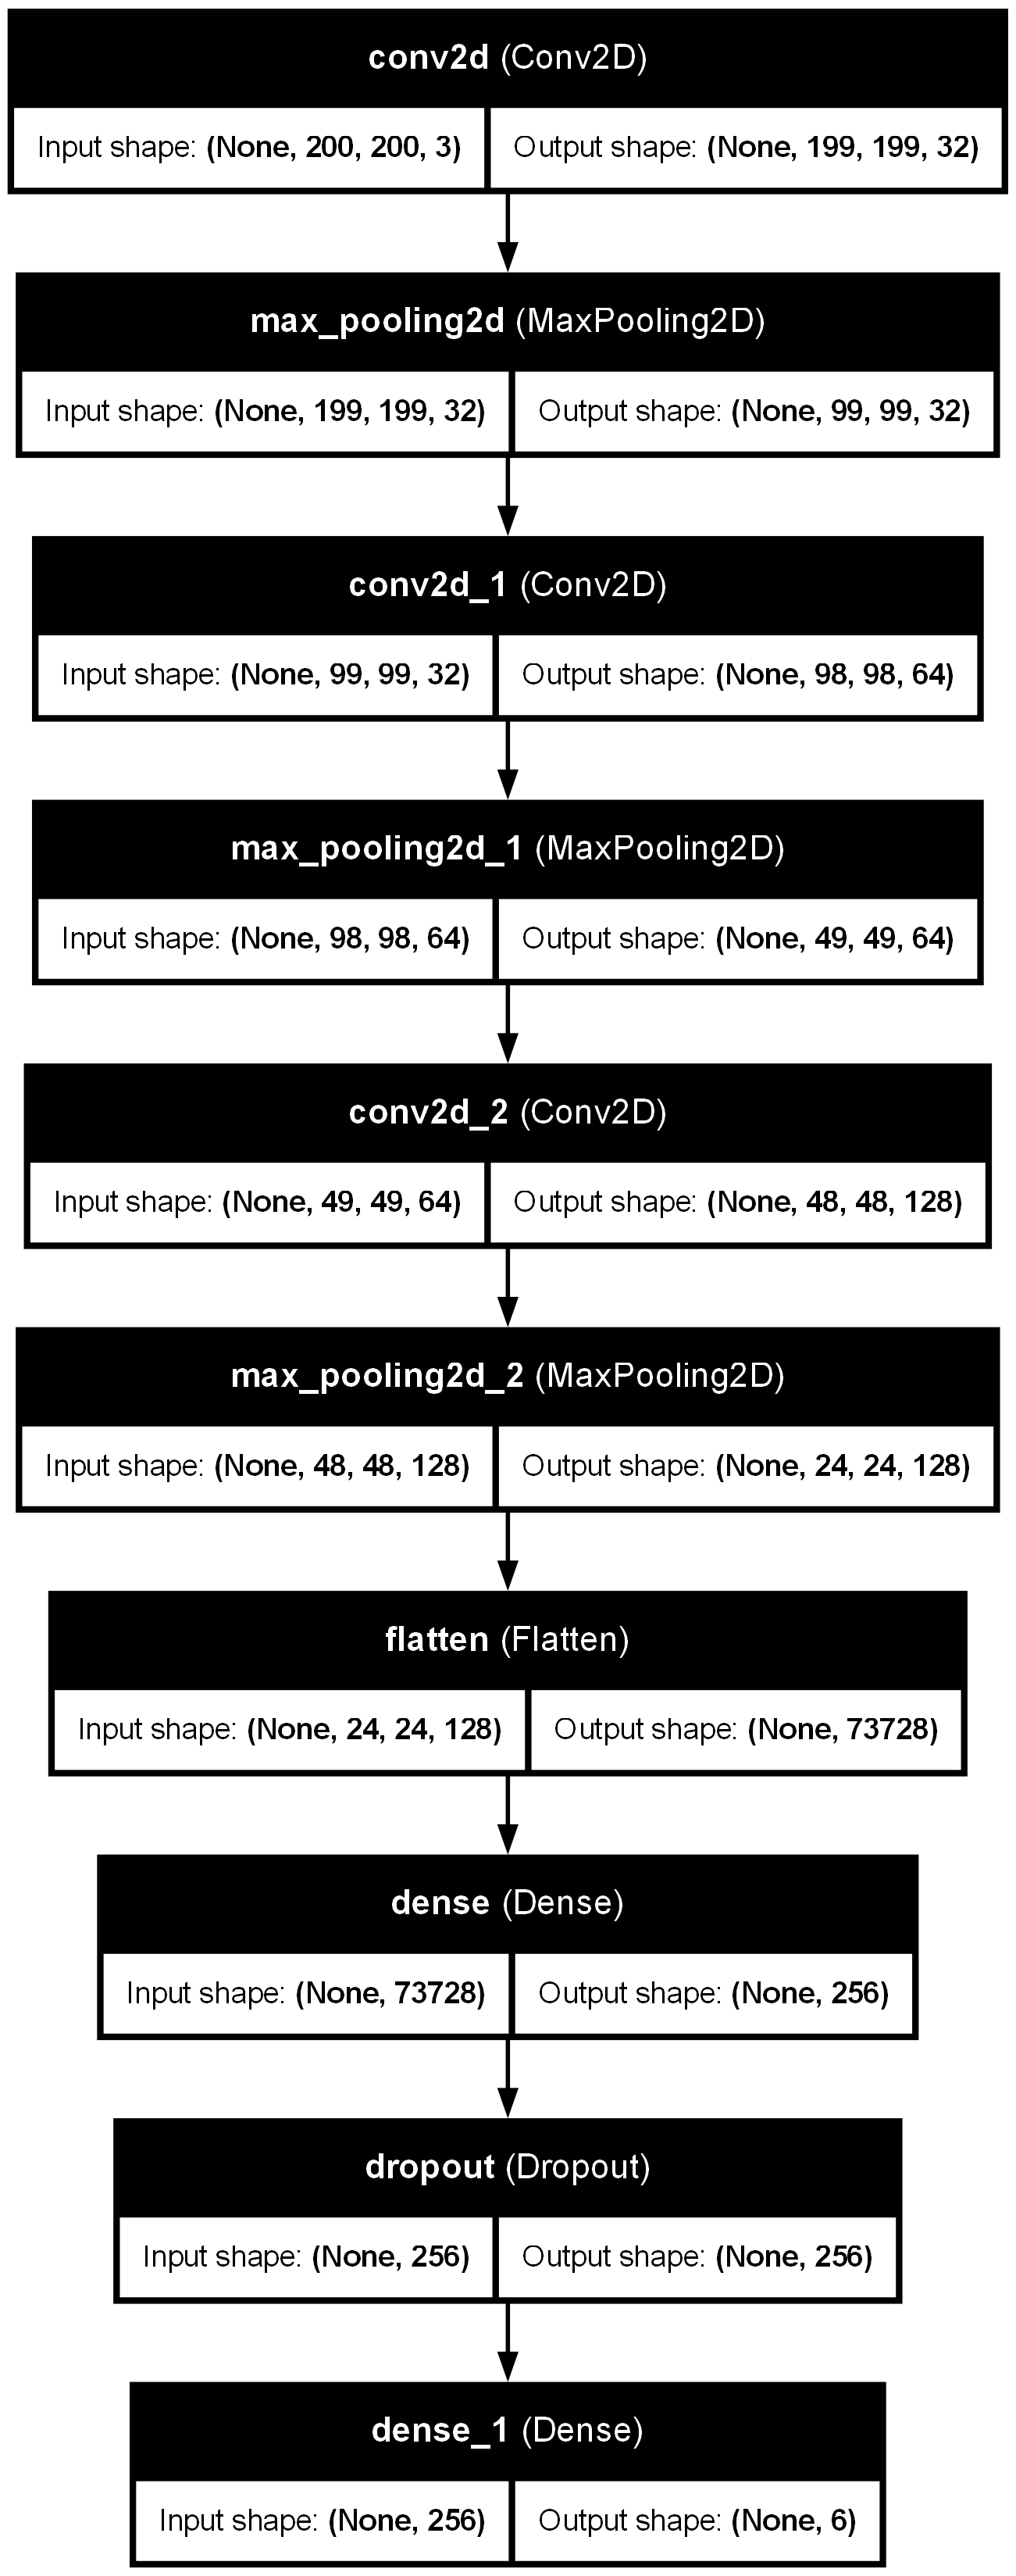

In [11]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:

histories = {}

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print('Compiled!')

Compiled!


In [13]:
callbacks = myCallback()
history = model.fit(train_generator,
        batch_size = 32,
        epochs=30,
        validation_data=validation_generator,
        callbacks=[callbacks],
        verbose=1, shuffle=True)

C:\Users\rajra\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 46s 261ms/step - accuracy: 0.3684 - loss: 1.5472 - val_accuracy: 0.5833 - val_loss: 0.9171
Epoch 2/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 39s 234ms/step - accuracy: 0.5876 - loss: 1.0158 - val_accuracy: 0.7222 - val_loss: 0.8706
Epoch 3/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 39s 235ms/step - accuracy: 0.7204 - loss: 0.7698 - val_accuracy: 0.8611 - val_loss: 0.3553
Epoch 4/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 40s 239ms/step - accuracy: 0.8001 - loss: 0.5525 - val_accuracy: 0.8056 - val_loss: 0.4905
Epoch 5/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 41s 243ms/step - accuracy: 0.8225 - loss: 0.4867 - val_accuracy: 0.9167 - val_loss: 0.1991
Epoch 6/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 48s 286ms/step - accuracy: 0.8333 - loss: 0.4678 - val_accuracy: 0.8333 - val_loss: 0.6082
Epoch 7/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 42s 252ms/step - accuracy: 0.8539 - loss: 0.4009 - val_accuracy: 0.8750 - val_loss: 0.2419
Epoch 8/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 41s 246ms/step - accuracy: 0.8593 - loss: 0

In [14]:
model_name = "Custom Model"

histories[model_name] = history

# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"{model_name} Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"{model_name} Validation Loss: {val_loss:.4f}\n")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0136
Custom Model Validation Accuracy: 100.00%
Custom Model Validation Loss: 0.0136



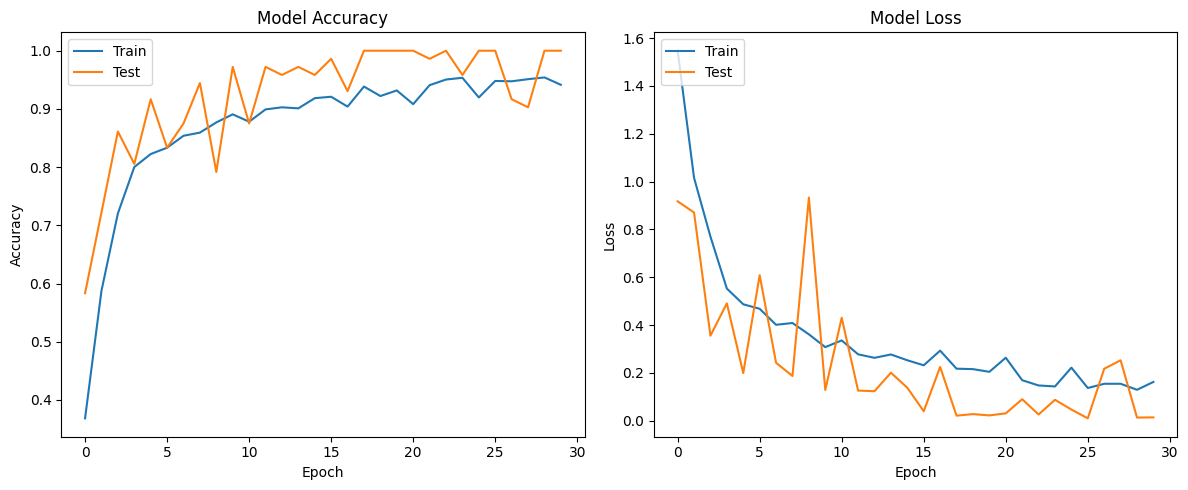

In [15]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 5)) 


plt.subplot(1, 2, 1)  
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)  
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout() 
plt.show()


In [16]:

from sklearn.datasets import load_files
import numpy as np

test_dir = 'NEU Metal Surface Defects Data/test'

def load_dataset(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
    
x_test, y_test,target_labels = load_dataset(test_dir)

In [17]:
no_of_classes = len(np.unique(y_test))
no_of_classes

6

In [18]:
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(y_test, no_of_classes)

In [19]:

from keras.preprocessing.image import array_to_img, img_to_array, load_img

def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        # Convert to Numpy Array
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

Test set shape :  (72, 200, 200, 3)


In [27]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

acc = accuracy_score(y_true,y_pred)
print("Accuracy : ",acc,"\n")

auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
print("AUC Score (macro): ",auc,"\n")

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=target_labels))

cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n\n", cm)

Accuracy :  0.9861111111111112 

AUC Score (macro):  0.9972222222222222 

Classification Report:

              precision    recall  f1-score   support

     Crazing       1.00      1.00      1.00        12
   Inclusion       0.92      1.00      0.96        12
     Patches       1.00      1.00      1.00        12
      Pitted       1.00      1.00      1.00        12
      Rolled       1.00      1.00      1.00        12
   Scratches       1.00      0.92      0.96        12

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72

Confusion Matrix:

 [[12  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0 12  0  0]
 [ 0  0  0  0 12  0]
 [ 0  1  0  0  0 11]]


In [28]:
model.save("model.keras")

In [29]:
x_test = x_test.astype('float32')/255

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


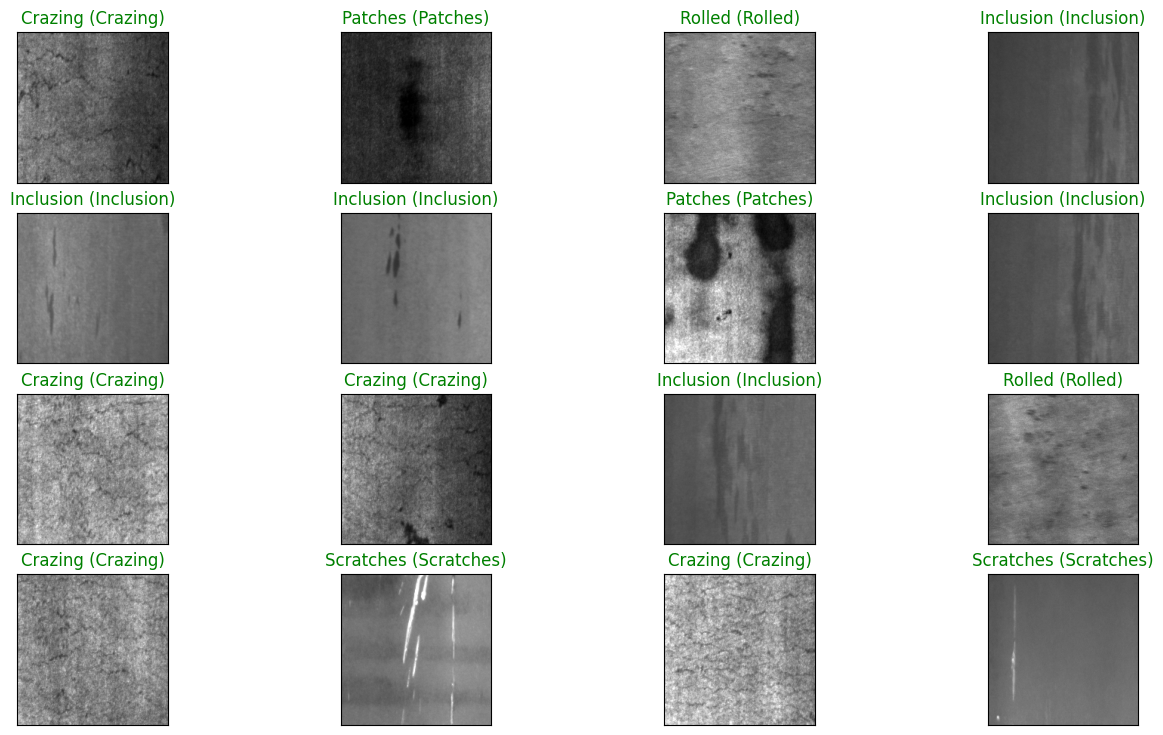

In [26]:


y_pred = model.predict(x_test)

fig = plt.figure(figsize=(16, 9))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))


In [41]:

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    channel_shift_range=20.0,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),  
    batch_size=32,
    class_mode='categorical'
)


Found 1656 images belonging to 6 classes.
Found 72 images belonging to 6 classes.


In [42]:
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [43]:
def create_model(base_model_name):
    if base_model_name == 'VGG16':
        base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    elif base_model_name == 'ResNet50':
        base_model = ResNet50(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    elif base_model_name == 'InceptionV3':
        base_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    else:
        raise ValueError("Base model not recognized. Please use VGG16, ResNet50, or InceptionV3.")

  
    base_model.trainable = False

    
    model = base_model.output
    model = GlobalAveragePooling2D()(model)
    model = Dense(256, activation='relu')(model)
    model = Dropout(0.5)(model)  
    model = Dense(6, activation='softmax')(model)

 
    model = Model(inputs=base_model.input, outputs=model)

    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:

base_models = ['VGG16', 'InceptionV3']

for model_name in base_models:
    print(f"Training {model_name} model...")
    model = create_model(model_name)

    history = model.fit(
        train_generator,
        epochs=20,
        validation_data=validation_generator,
        callbacks=[myCallback()], 
        verbose=1
    )

    histories[model_name] = history

    val_loss, val_accuracy = model.evaluate(validation_generator)
    print(f"{model_name} Validation Accuracy: {val_accuracy * 100:.2f}%")
    print(f"{model_name} Validation Loss: {val_loss:.4f}\n")


Training VGG16 model...
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 18s 0us/step
Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 229s 4s/step - accuracy: 0.2101 - loss: 1.8753 - val_accuracy: 0.6806 - val_loss: 1.5936
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 201s 4s/step - accuracy: 0.3279 - loss: 1.6507 - val_accuracy: 0.7639 - val_loss: 1.4070
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 214s 4s/step - accuracy: 0.4330 - loss: 1.4982 - val_accuracy: 0.8056 - val_loss: 1.2460
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 225s 4s/step - accuracy: 0.5302 - loss: 1.3512 - val_accuracy: 0.8333 - val_loss: 1.1105
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 216s 4s/step - accuracy: 0.6027 - loss: 1.2422 - val_accuracy: 0.8750 - val_loss: 0.9934
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 237s 5s/step - accuracy: 0.6516 - loss: 1.1453 - val_accuracy: 0.9028 - val_loss: 0.8929
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 236s 4s/step - accuracy: 0.7114 - loss: 1.0469 - val_accuracy: 0.9306 - val_loss: 0.8077
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━


Model Validation Accuracies:


,Model Name,Validation Accuracy
0,Custom Model,1.0


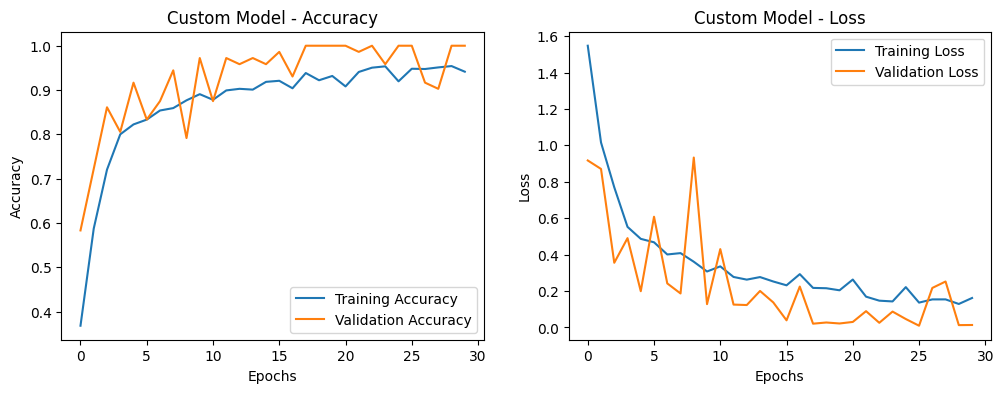

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


val_accuracies = {}


for model_name, history in histories.items():
    val_accuracy = max(history.history['val_accuracy'])
    val_accuracies[model_name] = val_accuracy


results_df = pd.DataFrame(list(val_accuracies.items()), columns=['Model Name', 'Validation Accuracy'])

print("\nModel Validation Accuracies:")
display(results_df)



def plot_history(history, model_name):
 
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


for model_name, history in histories.items():
    plot_history(history, model_name)
